In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib import ticker

> **test data**

In [104]:
clint_test=pd.read_csv("/kaggle/input/sddajdsxa/test/client_test.csv")
invoice_test=pd.read_csv("/kaggle/input/sddajdsxa/test/invoice_test.csv")

In [105]:
#start with test data
clint_test.head()

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


In [106]:
invoice_test.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC


In [107]:
print(clint_test.shape)
print(invoice_test.shape)

(58069, 5)
(1939730, 16)


In [108]:
print(clint_test.info())
print("------------------------------------")
print(invoice_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58069 entries, 0 to 58068
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   disrict        58069 non-null  int64 
 1   client_id      58069 non-null  object
 2   client_catg    58069 non-null  int64 
 3   region         58069 non-null  int64 
 4   creation_date  58069 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.2+ MB
None
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939730 entries, 0 to 1939729
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        int64 
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consomm

In [109]:
invoice_test.describe()

,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06
mean,2.011711e+01,1.250499e+11,4.207647e-02,1.733742e+02,7.321898e+00,1.000460e+00,4.146279e+02,1.165942e+02,2.154889e+01,5.715360e+01,1.823083e+04,1.889133e+04,1.171288e+02
std,1.346528e+01,1.675264e+12,3.745849e-01,1.346030e+02,1.359839e+00,2.973967e-02,6.035931e+02,1.087467e+03,2.352451e+02,9.352610e+02,4.348538e+04,4.464089e+04,7.834548e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.209900e+05,0.000000e+00,5.000000e+00,6.000000e+00,1.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.814000e+03,2.083000e+03,4.000000e+00
50%,1.100000e+01,4.943000e+05,0.000000e+00,2.030000e+02,8.000000e+00,1.000000e+00,2.770000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.819000e+03,8.326000e+03,4.000000e+00
75%,4.000000e+01,1.104817e+06,0.000000e+00,2.070000e+02,9.000000e+00,1.000000e+00,6.030000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.212000e+04,2.281400e+04,4.000000e+00
max,4.500000e+01,2.787340e+13,5.000000e+00,6.000000e+02,9.000000e+00,2.100000e+01,1.108580e+05,3.090390e+05,7.167000e+04,3.009340e+05,3.039577e+06,3.066673e+06,9.906880e+05


In [110]:
clint_test.describe()

,disrict,client_catg,region
count,58069.000000,58069.000000,58069.000000
mean,63.510617,11.507224,206.018461
std,3.356708,4.395923,104.144028
min,60.000000,11.000000,101.000000
25%,62.000000,11.000000,103.000000
50%,62.000000,11.000000,107.000000
75%,69.000000,11.000000,307.000000
max,69.000000,51.000000,399.000000


In [111]:
clint_test.nunique()

disrict              4
client_id        58069
client_catg          3
region              24
creation_date     7388
dtype: int64

In [112]:
invoice_test.nunique()

client_id                58069
invoice_date              6934
tarif_type                  16
counter_number           91966
counter_statue               6
counter_code                39
reading_remarque             4
counter_coefficient          7
consommation_level_1      6546
consommation_level_2      9700
consommation_level_3      1862
consommation_level_4      8838
old_index               116512
new_index               118365
months_number              914
counter_type                 2
dtype: int64

In [113]:
clint_test.value_counts()

disrict  client_id          client_catg  region  creation_date
60       test_Client_100    11           101     08/10/1992       1
63       test_Client_42751  11           312     28/03/2016       1
         test_Client_42622  11           311     24/12/1986       1
         test_Client_42626  11           379     11/02/2015       1
         test_Client_42631  11           313     11/11/2010       1
                                                                 ..
62       test_Client_26716  11           303     14/10/1981       1
         test_Client_2672   11           307     31/12/1996       1
         test_Client_26725  11           302     12/11/2016       1
         test_Client_26729  11           303     12/11/2013       1
69       test_Client_9999   11           104     14/03/1990       1
Length: 58069, dtype: int64

In [114]:
invoice_test.value_counts()

client_id          invoice_date  tarif_type  counter_number  counter_statue  counter_code  reading_remarque  counter_coefficient  consommation_level_1  consommation_level_2  consommation_level_3  consommation_level_4  old_index  new_index  months_number  counter_type
test_Client_8372   2010-07-16    11          3128            5               410           6                 1                    0                     0                     0                     0                     36795      36795      2              ELEC            2
test_Client_43096  2016-07-06    11          9894            0               413           8                 1                    22                    0                     0                     0                     80         102        4              ELEC            2
                   2016-02-15    11          9894            0               413           6                 1                    80                    0                     0           

In [115]:
clint_test = clint_test.drop(['creation_date'], axis=1)
invoice_test = invoice_test.drop(['invoice_date'], axis=1)

In [116]:
duplicate_rows_clint_test = clint_test[clint_test.duplicated()]
print(duplicate_rows_clint_test)

Empty DataFrame
Columns: [disrict, client_id, client_catg, region]
Index: []


In [117]:
invoice_test.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1939725    False
1939726    False
1939727    False
1939728    False
1939729    False
Length: 1939730, dtype: bool

In [118]:
print(clint_test.isnull().sum())

disrict        0
client_id      0
client_catg    0
region         0
dtype: int64


In [119]:
print(invoice_test.isnull().sum())

client_id               0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64


In [120]:
ordinal_encoding_counter_type = {"ELEC":1, "GAZ":2}
invoice_test["counter_type"] = invoice_test["counter_type"].replace(ordinal_encoding_counter_type)
invoice_test

,client_id,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,1
1,test_Client_0,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,1
2,test_Client_0,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,1
3,test_Client_0,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,1
4,test_Client_0,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939725,test_Client_9999,11,869269,0,203,6,1,248,0,0,0,21114,21362,4,1
1939726,test_Client_9999,11,869269,0,203,6,1,260,0,0,0,21362,21622,4,1
1939727,test_Client_9999,11,869269,0,203,6,1,312,0,0,0,22272,22584,4,1
1939728,test_Client_9999,11,869269,0,203,6,1,236,0,0,0,19909,20145,4,1


In [121]:
ordinal_encoding_counter_statue1 = {"0":0,"1":1,"2":2,"3":3,"4":4,"5":5,"46":46,"A":65,"618":618,
                                  "769":769,"269375":269375,"420":420}
invoice_test["counter_statue"] = invoice_test["counter_statue"].replace(ordinal_encoding_counter_statue1)


> **merge**

In [122]:
merged_test = pd.merge(clint_test, invoice_test, on='client_id')

In [123]:
client_id_mapping = {client_id: number for number, client_id in enumerate(merged_test['client_id'].unique())}

merged_test['client_id'] = merged_test['client_id'].map(client_id_mapping)

merged_test.to_csv('updated_dataset.csv', index=False)

In [124]:
merged_test.head(50)

,disrict,client_id,client_catg,region,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,62,0,11,307,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,1
1,62,0,11,307,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,1
2,62,0,11,307,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,1
3,62,0,11,307,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,1
4,62,0,11,307,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,1
5,62,0,11,307,11,651208,0,203,6,1,578,0,0,0,12254,12832,4,1
6,62,0,11,307,11,651208,0,203,8,1,1090,0,0,0,19900,20990,8,1
7,62,0,11,307,11,651208,0,203,6,1,329,0,0,0,21348,21677,4,1
8,62,0,11,307,11,651208,0,203,6,1,364,0,0,0,6439,6803,4,1
9,62,0,11,307,11,651208,0,203,6,1,462,0,0,0,10940,11402,4,1


In [125]:
print(merged_test.shape)

(1939730, 18)


In [126]:
merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939730 entries, 0 to 1939729
Data columns (total 18 columns):
 #   Column                Dtype
---  ------                -----
 0   disrict               int64
 1   client_id             int64
 2   client_catg           int64
 3   region                int64
 4   tarif_type            int64
 5   counter_number        int64
 6   counter_statue        int64
 7   counter_code          int64
 8   reading_remarque      int64
 9   counter_coefficient   int64
 10  consommation_level_1  int64
 11  consommation_level_2  int64
 12  consommation_level_3  int64
 13  consommation_level_4  int64
 14  old_index             int64
 15  new_index             int64
 16  months_number         int64
 17  counter_type          int64
dtypes: int64(18)
memory usage: 281.2 MB


In [127]:
print(merged_test.isnull().sum())

disrict                 0
client_id               0
client_catg             0
region                  0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64


> **train data**

In [128]:
clint_train=pd.read_csv("/kaggle/input/sddajdsxa/train/client_train.csv")
invoice_train=pd.read_csv("/kaggle/input/sddajdsxa/train/invoice_train.csv",low_memory=False)

In [129]:
clint_train.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [130]:
invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [131]:
print(clint_train.shape)
print(invoice_train.shape)

(135493, 6)
(4476749, 16)


In [132]:
print(clint_train.info())
print("------------------------------------")
print(invoice_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB
None
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   co

In [133]:
invoice_train.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [134]:
clint_train.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


In [135]:
clint_train.nunique()

disrict               4
client_id        135493
client_catg           3
region               25
creation_date      8088
target                2
dtype: int64

In [136]:
invoice_train.nunique()

client_id               135493
invoice_date              8275
tarif_type                  17
counter_number          201893
counter_statue              12
counter_code                42
reading_remarque             8
counter_coefficient         16
consommation_level_1      8295
consommation_level_2     12576
consommation_level_3      2253
consommation_level_4     12075
old_index               155648
new_index               157980
months_number             1370
counter_type                 2
dtype: int64

In [137]:
clint_train.value_counts().sum()

135493

In [138]:
invoice_train.value_counts().sum()

4476749

In [139]:
clint_train = clint_train.drop(['creation_date'], axis=1)

In [140]:
#clint_train = clint_train.drop(['creation_date'], axis=1)
invoice_train = invoice_train.drop(['invoice_date'], axis=1)

In [141]:
duplicate_rows_clint_train = clint_train[clint_train.duplicated()]
print(duplicate_rows_clint_train.shape)

(0, 5)


In [142]:
print(clint_train.isnull().sum())

disrict        0
client_id      0
client_catg    0
region         0
target         0
dtype: int64


In [143]:
print(invoice_train.isnull().sum())

client_id               0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64


In [144]:
invoice_train['counter_type'].value_counts()

ELEC    3079406
GAZ     1397343
Name: counter_type, dtype: int64

In [145]:
ordinal_encoding_mapping = {"ELEC":1, "GAZ":2}
invoice_train["counter_type"] = invoice_train["counter_type"].replace(ordinal_encoding_mapping)
invoice_train

,client_id,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,1
1,train_Client_0,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,1
2,train_Client_0,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,1
3,train_Client_0,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,1
4,train_Client_0,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,train_Client_99998,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,1
4476745,train_Client_99998,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,1
4476746,train_Client_99999,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,1
4476747,train_Client_99999,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,1


In [146]:
invoice_train['counter_type'].value_counts()

1    3079406
2    1397343
Name: counter_type, dtype: int64

In [147]:
invoice_train['counter_statue'].value_counts()

0         4379008
1           74036
5           20639
4            2729
3             258
2              32
46             14
A              13
618            12
769             6
269375          1
420             1
Name: counter_statue, dtype: int64

In [148]:
ordinal_encoding_counter_statue = {"0":0,"1":1,"2":2,"3":3,"4":4,"5":5,"46":46,"A":65,"618":618,
                                  "769":769,"269375":269375,"420":420}
invoice_train["counter_statue"] = invoice_train["counter_statue"].replace(ordinal_encoding_counter_statue)


In [149]:
invoice_train['counter_statue'].value_counts()

0         4379008
1           74036
5           20639
4            2729
3             258
2              32
46             14
65             13
618            12
769             6
269375          1
420             1
Name: counter_statue, dtype: int64

In [150]:
invoice_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 15 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   tarif_type            int64 
 2   counter_number        int64 
 3   counter_statue        int64 
 4   counter_code          int64 
 5   reading_remarque      int64 
 6   counter_coefficient   int64 
 7   consommation_level_1  int64 
 8   consommation_level_2  int64 
 9   consommation_level_3  int64 
 10  consommation_level_4  int64 
 11  old_index             int64 
 12  new_index             int64 
 13  months_number         int64 
 14  counter_type          int64 
dtypes: int64(14), object(1)
memory usage: 512.3+ MB


> **merge**

In [151]:
merged_train = pd.merge(clint_train, invoice_train, on=['client_id'])

In [152]:
client_id_mapping_train = {client_id: number for number, client_id in enumerate(merged_train['client_id'].unique())}

merged_train['client_id'] = merged_train['client_id'].map(client_id_mapping_train)

merged_train.to_csv('updated_dataset_train.csv', index=False)

In [153]:
merged_train.head()

,disrict,client_id,client_catg,region,target,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,0,11,101,0.0,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,1
1,60,0,11,101,0.0,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,1
2,60,0,11,101,0.0,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,1
3,60,0,11,101,0.0,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,1
4,60,0,11,101,0.0,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,1


In [154]:
print(merged_train.shape)

(4476749, 19)


In [155]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476749 entries, 0 to 4476748
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   disrict               int64  
 1   client_id             int64  
 2   client_catg           int64  
 3   region                int64  
 4   target                float64
 5   tarif_type            int64  
 6   counter_number        int64  
 7   counter_statue        int64  
 8   counter_code          int64  
 9   reading_remarque      int64  
 10  counter_coefficient   int64  
 11  consommation_level_1  int64  
 12  consommation_level_2  int64  
 13  consommation_level_3  int64  
 14  consommation_level_4  int64  
 15  old_index             int64  
 16  new_index             int64  
 17  months_number         int64  
 18  counter_type          int64  
dtypes: float64(1), int64(18)
memory usage: 683.1 MB


In [156]:
print(merged_train.isnull().sum())

disrict                 0
client_id               0
client_catg             0
region                  0
target                  0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64


In [157]:
print(merged_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476749 entries, 0 to 4476748
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   disrict               int64  
 1   client_id             int64  
 2   client_catg           int64  
 3   region                int64  
 4   target                float64
 5   tarif_type            int64  
 6   counter_number        int64  
 7   counter_statue        int64  
 8   counter_code          int64  
 9   reading_remarque      int64  
 10  counter_coefficient   int64  
 11  consommation_level_1  int64  
 12  consommation_level_2  int64  
 13  consommation_level_3  int64  
 14  consommation_level_4  int64  
 15  old_index             int64  
 16  new_index             int64  
 17  months_number         int64  
 18  counter_type          int64  
dtypes: float64(1), int64(18)
memory usage: 683.1 MB
None


In [158]:
aggregations = {'disrict': 'mean','client_catg':'max','region':'max','target':'max',
                'tarif_type': 'max','counter_number':'max','counter_statue':'max','counter_code':'max',
                'reading_remarque': 'max','counter_coefficient':'mean','consommation_level_1':'mean',
                'consommation_level_2':'mean','consommation_level_3': 'mean','consommation_level_4':'mean',
                'old_index':'mean','new_index':'mean','months_number': 'max','counter_type': 'max'}
merged_train = merged_train.groupby(['client_id']).agg(aggregations).reset_index()

In [159]:
merged_train.head()

,client_id,disrict,client_catg,region,target,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,0,60.0,11,101,0.0,11,1335667,0,207,9,1.0,352.400000,10.571429,0.000000,0.000000,9444.542857,9807.514286,12,1
1,1,69.0,11,107,0.0,11,678902,0,203,9,1.0,557.540541,0.000000,0.000000,0.000000,14330.756757,14888.297297,8,1
2,2,62.0,11,301,0.0,11,572765,0,207,9,1.0,798.611111,37.888889,0.000000,0.000000,32873.000000,33709.500000,12,1
3,3,69.0,11,105,0.0,11,2078,0,413,9,1.0,1.200000,0.000000,0.000000,0.000000,94.150000,95.350000,6,1
4,4,62.0,11,303,0.0,11,19575,0,207,9,1.0,663.714286,104.857143,117.357143,36.714286,6900.428571,7823.071429,4,1


> visulization

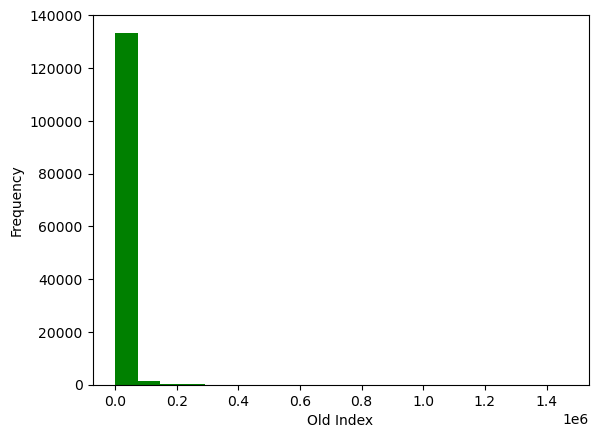

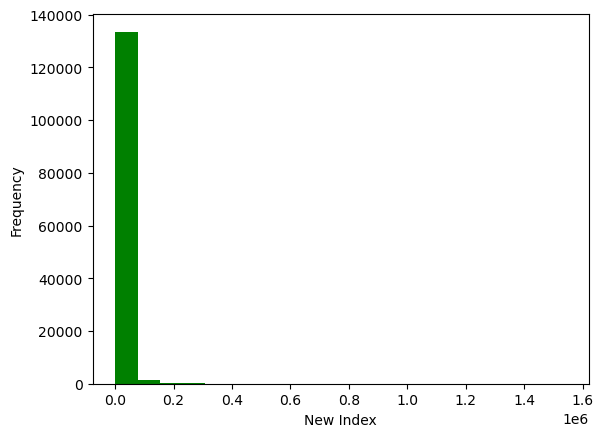

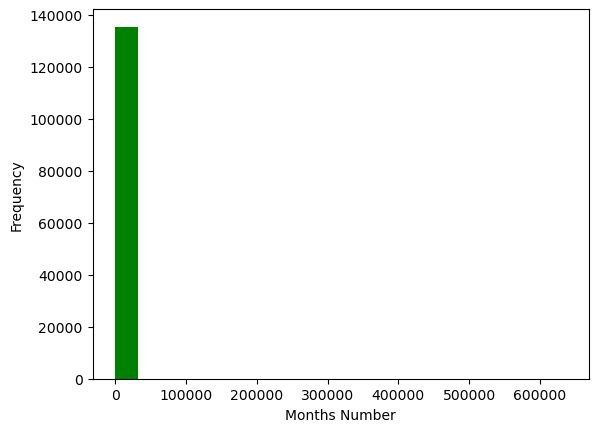

In [160]:
plt.hist(merged_train['old_index'], bins=20, color='green')
plt.xlabel('Old Index')
plt.ylabel('Frequency')
plt.show()

plt.hist(merged_train['new_index'], bins=20, color='green')
plt.xlabel('New Index')
plt.ylabel('Frequency')
plt.show()

plt.hist(merged_train['months_number'], bins=20, color='green')
plt.xlabel('Months Number')
plt.ylabel('Frequency')
plt.show()

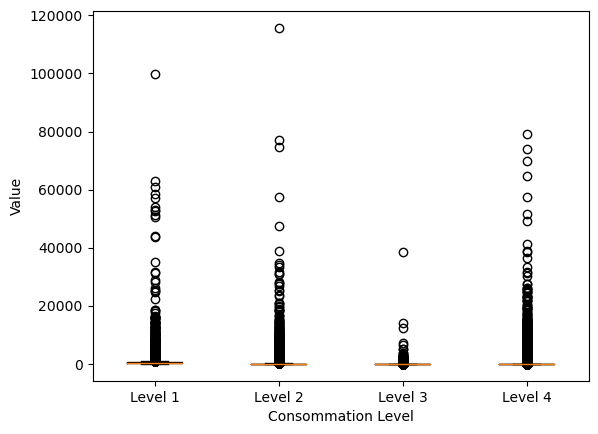

In [161]:
data = [merged_train['consommation_level_1'], merged_train['consommation_level_2'], 
        merged_train['consommation_level_3'], merged_train['consommation_level_4']]

plt.boxplot(data)
plt.xticks([1, 2, 3, 4], ['Level 1', 'Level 2', 'Level 3', 'Level 4'])
plt.xlabel('Consommation Level')
plt.ylabel('Value')
plt.show()

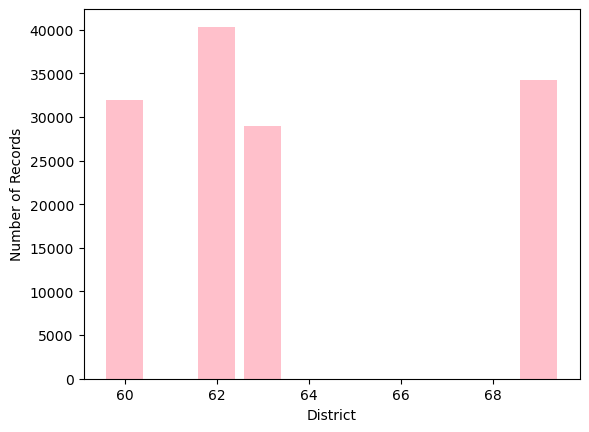

In [162]:
district_counts = merged_train['disrict'].value_counts()
plt.bar(district_counts.index, district_counts.values, color='pink')
plt.xlabel('District')
plt.ylabel('Number of Records')
plt.show()

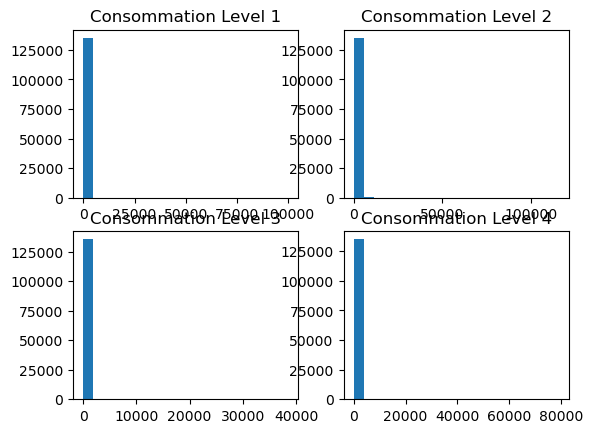

In [163]:
level1 = merged_train['consommation_level_1']
level2 = merged_train['consommation_level_2']
level3 = merged_train['consommation_level_3']
level4 = merged_train['consommation_level_4']

fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(level1, bins=20)
axs[0, 0].set_title('Consommation Level 1')
axs[0, 1].hist(level2, bins=20)
axs[0, 1].set_title('Consommation Level 2')
axs[1, 0].hist(level3, bins=20)
axs[1, 0].set_title('Consommation Level 3')
axs[1, 1].hist(level4, bins=20)
axs[1, 1].set_title('Consommation Level 4')
plt.show()

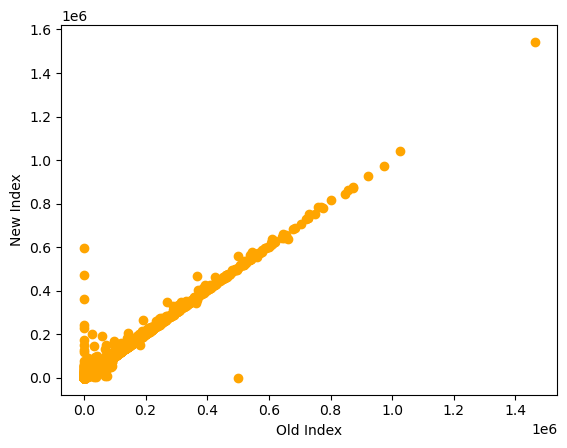

In [164]:
old_index = merged_train['old_index']
new_index = merged_train['new_index']

plt.scatter(old_index, new_index, color='orange')
plt.xlabel('Old Index')
plt.ylabel('New Index')
plt.show()

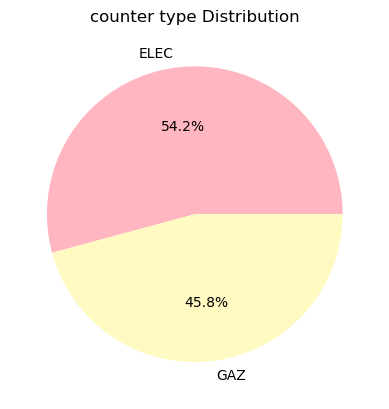

In [165]:
counter_type_counts = merged_train['counter_type'].value_counts()

colors = ['#ffb6c1','#fffac1'] # light pink, yellow, baby blue
plt.pie(counter_type_counts.values, labels = ['ELEC','GAZ'], colors=colors, autopct='%1.1f%%')
plt.title('counter type Distribution')
plt.show()

In [166]:
merged_train['target'].value_counts()

0.0    127927
1.0      7566
Name: target, dtype: int64

<Axes: xlabel='target'>

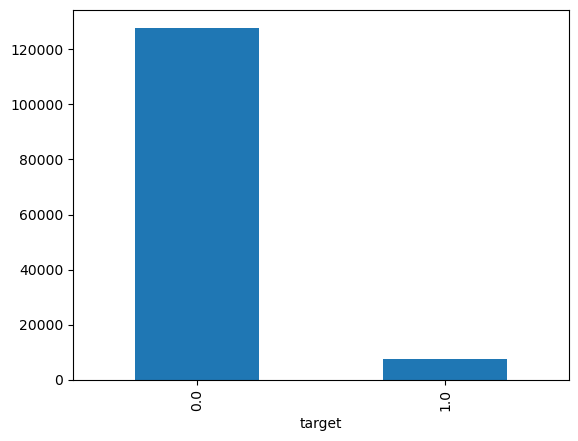

In [167]:
merged_train.value_counts(merged_train["target"]).plot(kind="bar")

> Deal with outlier

In [168]:
test_no_outliers = merged_test.copy()
train_no_outliers = merged_train.copy()


In [169]:
def outliers_removal(df,col_name,threshold = 1.5):

    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)

    outliers = (df[col_name] < lower_bound) | (df[col_name] > upper_bound)

    dfx_ = df[~outliers]

    return dfx_

def detect_outliers_vis(df,col_name):
    # Box plot

    sns.boxplot(df[col_name])
    plt.title(f'outliers for {col_name}')
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

<Figure size 640x480 with 0 Axes>

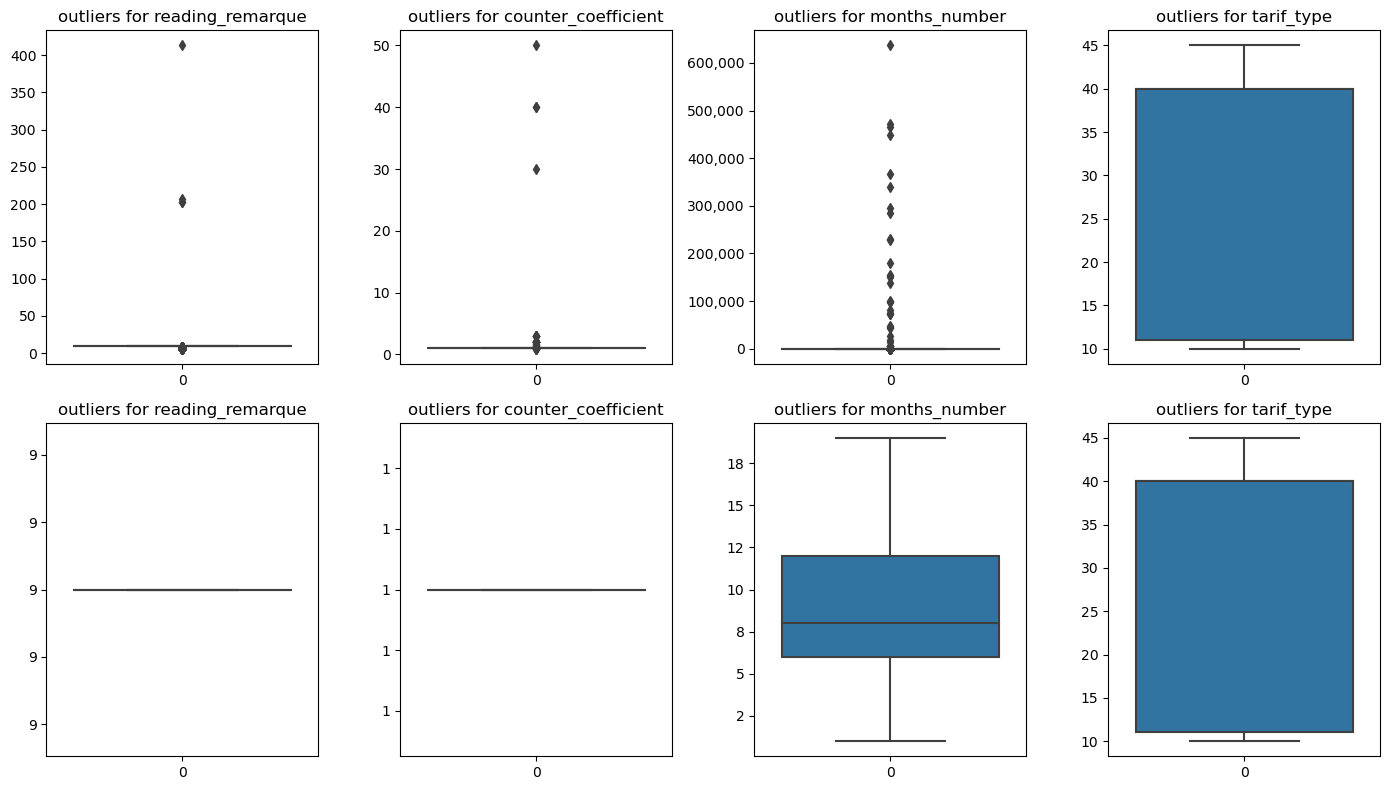

In [170]:
cols = ['reading_remarque','counter_coefficient','months_number','tarif_type']
plt.clf()
plt.figure(figsize=(14,8))
for i, col in enumerate(cols):
    plt.subplot(2, len(cols), i+1)
    detect_outliers_vis(train_no_outliers,col)

    plt.subplot(2, len(cols), i+(len(cols)+1))
    train_no_outliers = outliers_removal(train_no_outliers,col)
    detect_outliers_vis(train_no_outliers,col)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

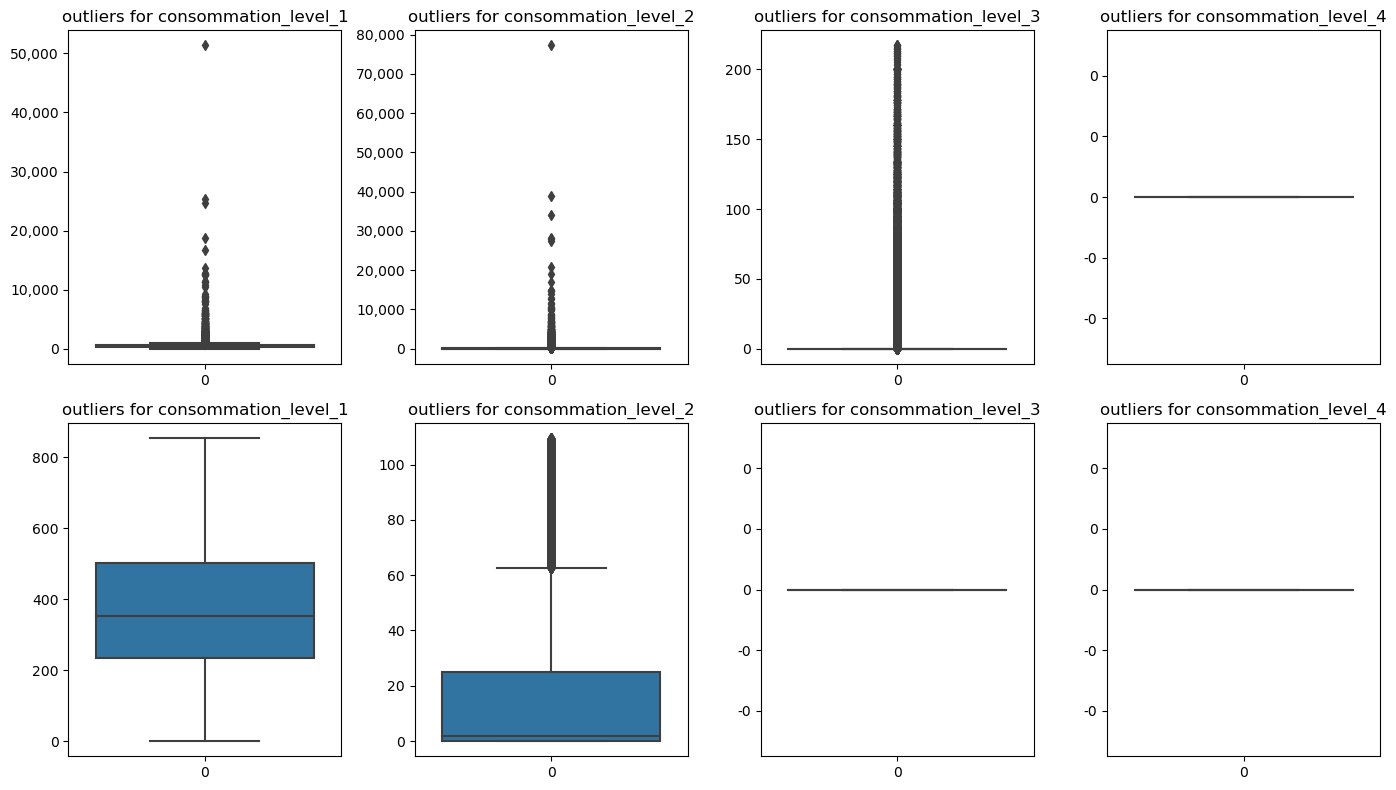

In [171]:
cols = ['consommation_level_1','consommation_level_2','consommation_level_3','consommation_level_4']
plt.clf()
plt.figure(figsize=(14,8))
for i, col in enumerate(cols):
    plt.subplot(2, len(cols), i+1)
    detect_outliers_vis(train_no_outliers,col)

    # deleting the outliers
    plt.subplot(2, len(cols), i+(len(cols)+1))
    train_no_outliers = outliers_removal(train_no_outliers,col,1)
    detect_outliers_vis(train_no_outliers,col)
    
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

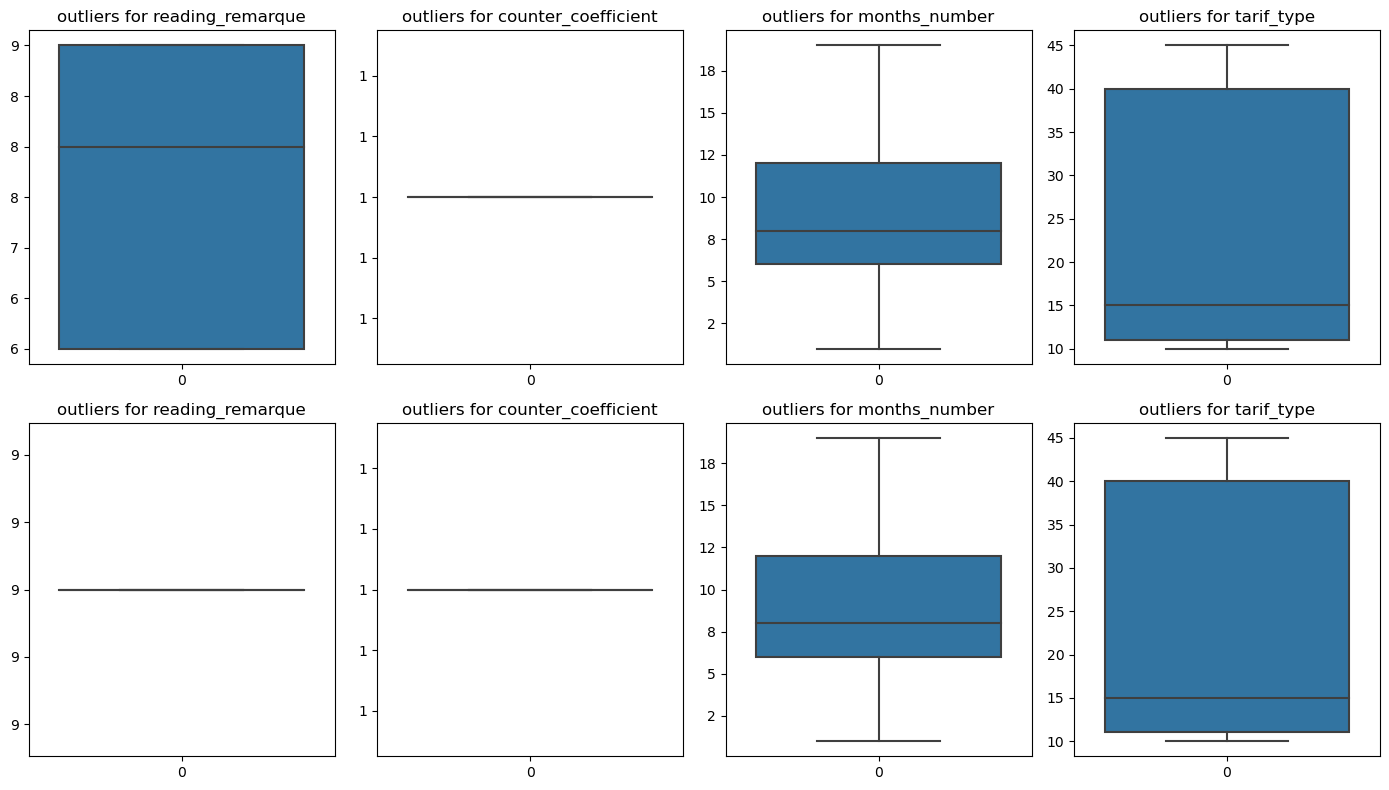

In [172]:
cols = ['reading_remarque','counter_coefficient','months_number','tarif_type']
plt.clf()
plt.figure(figsize=(14,8))
for i, col in enumerate(cols):
    plt.subplot(2, len(cols), i+1)
    detect_outliers_vis(test_no_outliers,col)

    plt.subplot(2, len(cols), i+(len(cols)+1))
    test_no_outliers = outliers_removal(train_no_outliers,col)
    detect_outliers_vis(test_no_outliers,col)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

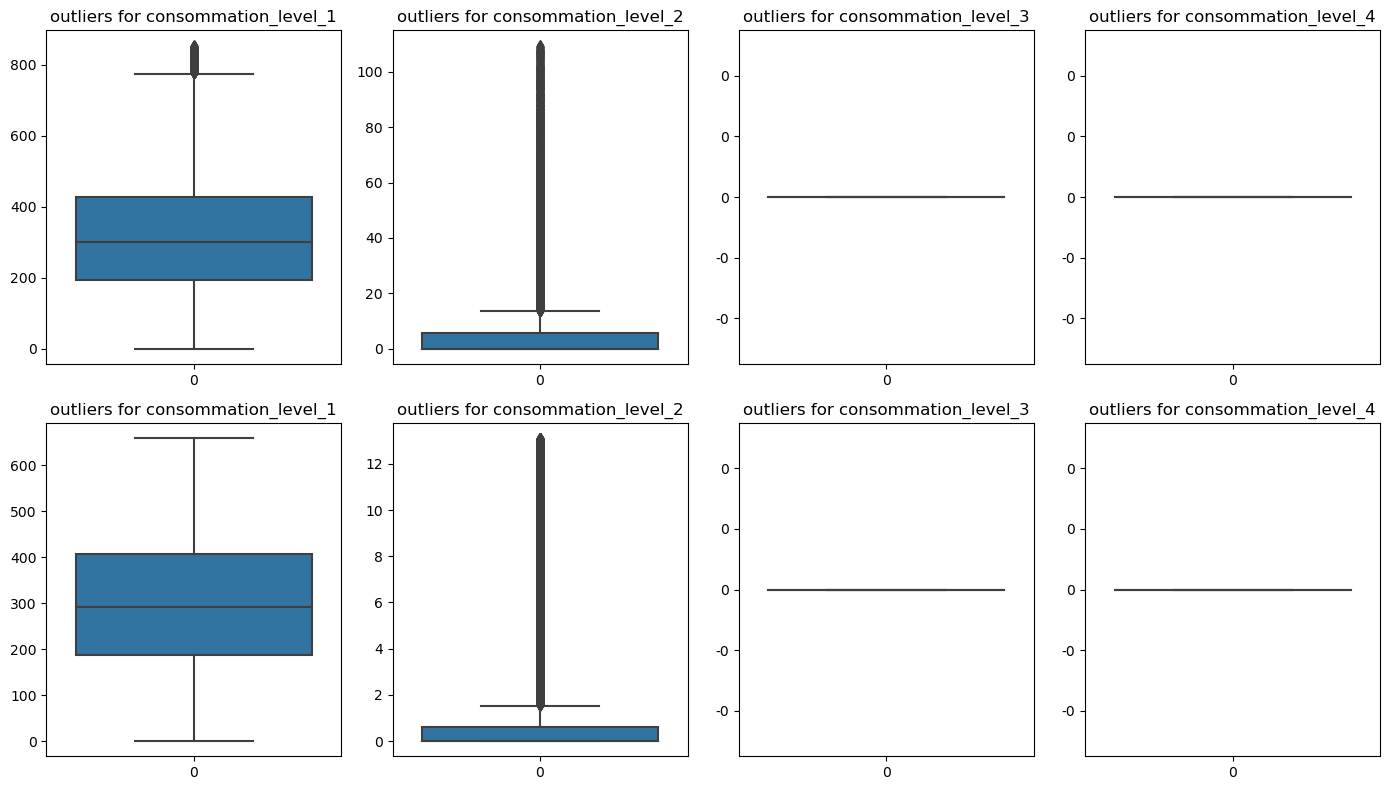

In [173]:
cols = ['consommation_level_1','consommation_level_2','consommation_level_3','consommation_level_4']
plt.clf()
plt.figure(figsize=(14,8))
for i, col in enumerate(cols):
    plt.subplot(2, len(cols), i+1)
    detect_outliers_vis(test_no_outliers,col)

    # deleting the outliers
    plt.subplot(2, len(cols), i+(len(cols)+1))
    test_no_outliers = outliers_removal(train_no_outliers,col,1)
    detect_outliers_vis(test_no_outliers,col)
    
plt.tight_layout()
plt.show()

> Imbalnce data to balance

In [174]:
train_no_outliers.head(50)

,client_id,disrict,client_catg,region,target,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,0,60.0,11,101,0.0,11,1335667,0,207,9,1.0,352.400000,10.571429,0.0,0.0,9444.542857,9807.514286,12,1
1,1,69.0,11,107,0.0,11,678902,0,203,9,1.0,557.540541,0.000000,0.0,0.0,14330.756757,14888.297297,8,1
2,2,62.0,11,301,0.0,11,572765,0,207,9,1.0,798.611111,37.888889,0.0,0.0,32873.000000,33709.500000,12,1
3,3,69.0,11,105,0.0,11,2078,0,413,9,1.0,1.200000,0.000000,0.0,0.0,94.150000,95.350000,6,1
6,6,62.0,11,309,0.0,40,50838,1,413,9,1.0,280.025000,6.550000,0.0,0.0,19788.750000,20075.325000,8,2
7,7,60.0,11,101,0.0,40,1031527,1,203,9,1.0,327.500000,0.923077,0.0,0.0,6583.141026,6911.564103,8,2
8,8,62.0,11,301,0.0,11,144129,0,413,9,1.0,112.500000,0.000000,0.0,0.0,3.500000,116.000000,4,1
10,10,63.0,12,311,0.0,40,1052129,0,203,9,1.0,216.230769,0.000000,0.0,0.0,874.538462,1090.769231,4,2
11,11,62.0,11,304,0.0,40,6849590,0,203,9,1.0,635.486842,22.026316,0.0,0.0,23723.881579,24381.394737,8,2
13,13,60.0,11,101,0.0,11,96640,1,203,9,1.0,175.884615,17.538462,0.0,0.0,3568.730769,3762.153846,8,1


In [175]:
print(train_no_outliers.columns)

Index(['client_id', 'disrict', 'client_catg', 'region', 'target', 'tarif_type',
       'counter_number', 'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type'],
      dtype='object')


In [176]:
from imblearn.over_sampling import SMOTE

In [177]:
X = train_no_outliers.drop(columns=['target']) # Features
y = train_no_outliers['target']

In [178]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [179]:
balanced_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

In [180]:
balanced_df['target'].value_counts()

0.0    64039
1.0    64039
Name: target, dtype: int64

> TRAIN THE MODEL

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.linear_model import LogisticRegression

In [182]:
X = train_no_outliers.drop(columns=['target','client_id']) # Features
y = train_no_outliers['target']

In [183]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
model = LogisticRegression(random_state=42)

In [185]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [186]:
# make predictions on the val set
y_pred = model.predict(X_val)

In [187]:
# evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.96


In [188]:
from sklearn import metrics

In [189]:
metrics.mean_absolute_error(y_val, y_pred)

0.042932875382662584

In [190]:
metrics.mean_squared_error(y_val, y_pred)

0.042932875382662584

In [191]:
np.sqrt(metrics.mean_squared_error(y_val, y_pred))

0.20720249849522226

In [192]:
from sklearn.metrics import classification_report as CLA_RE  

In [193]:
class_names = train_no_outliers.target

In [194]:
print(CLA_RE(y_val, y_pred,zero_division=0))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     12818
         1.0       0.00      0.00      0.00       575

    accuracy                           0.96     13393
   macro avg       0.48      0.50      0.49     13393
weighted avg       0.92      0.96      0.94     13393



> TEST THE MODEL

In [195]:
print(test_no_outliers.head())

   client_id  disrict  client_catg  region  target  tarif_type  \
0          0     60.0           11     101     0.0          11   
1          1     69.0           11     107     0.0          11   
2          2     62.0           11     301     0.0          11   
3          3     69.0           11     105     0.0          11   
6          6     62.0           11     309     0.0          40   

   counter_number  counter_statue  counter_code  reading_remarque  \
0         1335667               0           207                 9   
1          678902               0           203                 9   
2          572765               0           207                 9   
3            2078               0           413                 9   
6           50838               1           413                 9   

   counter_coefficient  consommation_level_1  consommation_level_2  \
0                  1.0            352.400000             10.571429   
1                  1.0            557.540541    

In [203]:
X = train_no_outliers.drop(columns=['client_id']) 

In [204]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
model = LogisticRegression(random_state=42)

In [206]:
model.fit(X_val, y_val)

LogisticRegression(random_state=42)

> Sample

In [207]:
import pandas as pd

sample_submission = pd.read_csv('/kaggle/input/sddajdsxa/Sample_Submission.csv')

print(sample_submission.columns)

Index(['client_id', 'target'], dtype='object')


In [210]:
def predict_prop(model, X):
    probs = model.predict_proba(X)
    
    return probs

results = pd.DataFrame({
        "client_id": sample_submission["client_id"][:len(X_val)],
        "target": predict_prop(model, X_val)[:,1]
    })

results.to_csv('submission.csv', index=False)

In [211]:
results.head(30)

,client_id,target
0,test_Client_0,0.500000
1,test_Client_1,0.500000
2,test_Client_10,0.500000
3,test_Client_100,0.500000
4,test_Client_1000,0.500000
5,test_Client_10000,0.454339
6,test_Client_10001,0.500000
7,test_Client_10002,0.500000
8,test_Client_10003,0.500000
9,test_Client_10004,0.500000
